<a href="https://colab.research.google.com/github/omkarpattnaik8080/PlacementPrediction/blob/main/Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/placement (1).csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
#we can see that there is an unnecessary column so in the preprocessing step we will remove it for that use the down step!

In [26]:
df=df.iloc[:,1:]#rows mujhe sare chahiye par columns mujhe rows onwards chahiye

In [5]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split (cross validation)
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

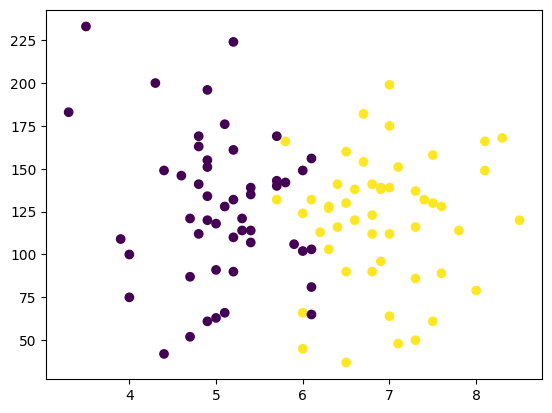

In [6]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [7]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [8]:
x

,Unnamed: 0,cgpa
0,0,6.8
1,1,5.9
2,2,5.3
3,3,7.4
4,4,5.8
...,...,...
95,95,4.3
96,96,4.4
97,97,6.7
98,98,6.3


In [9]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
#test_size matlab training data mein kitna points jayega aaur test mein kitna jayega

In [11]:
x_train

,Unnamed: 0,cgpa
35,35,6.8
11,11,6.9
84,84,5.7
44,44,7.5
73,73,4.9
...,...,...
43,43,6.8
22,22,4.9
72,72,7.3
15,15,5.1


In [12]:
y_train

,placement
35,1
11,1
84,0
44,1
73,0
...,...
43,1
22,0
72,1
15,0


In [13]:
x_test

,Unnamed: 0,cgpa
83,83,7.5
30,30,7.6
56,56,6.1
24,24,4.7
16,16,5.2
23,23,4.7
2,2,5.3
27,27,6.0
28,28,5.2
13,13,6.4


In [14]:
y_test

,placement
83,1
30,1
56,0
24,0
16,0
23,0
2,0
27,1
28,0
13,1


In [15]:
#scaling(sari values ko 1 aaur -1 ke beech mein lanaaa)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
X_train=scaler.fit_transform(x_train)
X_test=scaler.transform(x_test)

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
clf=LogisticRegression()

In [19]:
clf.fit(X_train,y_train)  #fit is used to train the model

LogisticRegression()

In [22]:
#model evaluation by finding out the accuracy
y_pred=clf.predict(X_test)

In [23]:
y_test

,placement
83,1
30,1
56,0
24,0
16,0
23,0
2,0
27,1
28,0
13,1


In [24]:
#from comparing above 2 i have to see how many correct predictions my model has actually done
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

<Axes: >

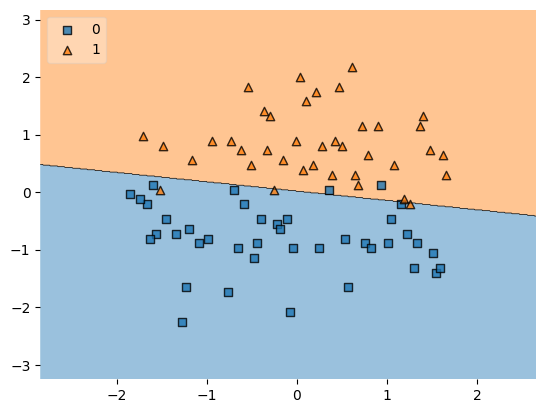

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [29]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))

In [30]:
! pip install streamlit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 66.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.3 MB/s eta 0:00:00
